<a href="https://colab.research.google.com/github/shanmukh2325/Shanmukha_INFO5731_-Fall2023/blob/main/Bollavaram_Exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fourth in-class-exercise (40 points in total, 03/28/2022)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [1]:
import urllib.request
from bs4 import BeautifulSoup
import csv

# Initialize variables to count news items and pages
news_count = 0
max_news_count = 1000
max_pages = 18

# Initialize the base URL
base_url = "https://research.unt.edu/news?page="


data = []

# Loop through each page
for page_num in range(1, max_pages + 1):
    # Construct the URL for the current page
    url = base_url + str(page_num)

    # Send an HTTP GET request to the URL
    response = urllib.request.urlopen(url)

    # Parse the HTML content of the page using BeautifulSoup
    soup = BeautifulSoup(response, 'html.parser')

    # Find all elements with class "news-item"
    news_items = soup.find_all(class_='news-item')


    for item in news_items:
        if news_count >= max_news_count:
            break


        news_title_element = item.find(class_='news-title')
        news_title = news_title_element.text.strip() if news_title_element else "Title Not Available"


        news_lead_element = item.find(class_='news-lead')
        news_lead = news_lead_element.text.strip() if news_lead_element else "Lead Not Available"


        story_tags_element = item.find_all(class_='story-tags')
        story_tags = ', '.join([tag.text.strip() for tag in story_tags_element]) if story_tags_element else "Story Tags Not Available"


        data.append([news_title, news_lead, story_tags])

        news_count += 1


    if news_count >= max_news_count:
        break

# Save the data to a CSV file
csv_filename = "news_data.csv"
with open(csv_filename, 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.writer(csvfile)


    csv_writer.writerow(["News Title", "News Lead", "Story Tags"])

    # Write the data
    csv_writer.writerows(data)

print(f"Data saved to {csv_filename}")

Data saved to news_data.csv


In [4]:
import pandas as pd

df = pd.read_csv("news_data.csv")

df.head()

,News Title,News Lead,Story Tags
0,Biology professor earns award for mentoring st...,Biology Professor Jannon Fuchs has been select...,#College of Science#Texas Academy of Mathemati...
1,Music history professor earns National Endowme...,Rebecca Geoffroy-Schwinden studies music in th...,NaN
2,National Science Foundation recognizes biomedi...,"Melanie Ecker will use the $553,036 award give...",#College of Engineering#Health#Biomedical#Gran...
3,UNT receives $1 million to lead network of reg...,The team will focus on transforming logistics ...,#Center for Integrated Intelligent Mobility Sy...
4,TAMS student earns Goldwater Scholarship for r...,Jathin Pranav Singaraju's research is dedicate...,#College of Engineering#Texas Academy of Mathe...


In [5]:
import nltk;
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
# Import the nltk library for natural language processing and text analysis
import nltk


nltk.download('stopwords')


import os


def install_java():
    # Install OpenJDK 8 using apt-get without displaying output
    !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null


    os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

    # Verify the Java version
    !java -version

# Call the install_java function to install Java
install_java()

# Install the 'pyLDAvis' library, which is used for visualizing LDA (Latent Dirichlet Allocation) models
!pip install pyLDAvis

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


openjdk version "11.0.20.1" 2023-08-24
OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04)
OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 31.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conf

In [7]:
!pip install --upgrade gensim

# Import the necessary libraries for web scraping, data manipulation, and natural language processing.
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import itertools
import lxml.html as LH
import urllib.request as urllib2



In [8]:
from pprint import pprint

# Import Gensim libraries for topic modeling.
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel


import spacy

# Import plotting tools for visualizing topic models.
import pyLDAvis
import pyLDAvis.gensim


import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

# Suppress deprecation warnings to prevent them from cluttering the output.
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [9]:
# Import the 'nltk' library, which is used for natural language processing tasks.
import nltk


nltk.download('stopwords')


from nltk.corpus import stopwords


stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])


def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

# Access the 'reviews' column from a DataFrame 'df' and convert it to a list of values.
rev_data = df['News Title'].values.tolist()

# Tokenize the reviews using the 'sent_to_words' function.
rev_data_words = list(sent_to_words(rev_data))


rev_data_words = remove_stopwords(rev_data_words)

# Print the tokenized and stop-word-removed words from the first review.
print(rev_data_words[:1])

[['biology', 'professor', 'earns', 'award', 'mentoring', 'students', 'become', 'next', 'generation', 'researchers']]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Create bigram and trigram models using Gensim's Phrases to find common phrases in the text data.
bigram = gensim.models.Phrases(rev_data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[rev_data_words], threshold=100)


bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]


def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]


def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# Define a function 'lemmatization' to perform lemmatization on a list of texts, considering specified part-of-speech tags.
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out


data_words_nostops = remove_stopwords(rev_data_words)

# Apply the bigram model to the tokenized reviews.
data_words_bigrams = make_bigrams(data_words_nostops)


nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Perform lemmatization on the text data, considering specified part-of-speech tags.
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# Print the lemmatized data from the first review.
print(data_lemmatized[:1])

[['biology', 'professor', 'earn', 'award', 'mentor', 'student', 'become', 'next', 'generation', 'researcher']]


In [11]:
news = corpora.Dictionary(data_lemmatized)
news_title = data_lemmatized
news_corpus = [news.doc2bow(text) for text in news_title]
print(news_corpus[:1])
[[(news[i], f) for i, f in c] for c in news_corpus[:1]]

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]]


[[('award', 1),
  ('become', 1),
  ('biology', 1),
  ('earn', 1),
  ('generation', 1),
  ('mentor', 1),
  ('next', 1),
  ('professor', 1),
  ('researcher', 1),
  ('student', 1)]]

In [15]:
# Import the necessary libraries
import gensim


lda_model = gensim.models.ldamodel.LdaModel(
    corpus=news_corpus,
    num_topics=20,  # Specify the number of topics you want to extract
    random_state=70,
    update_every=1,
    chunksize=70,
    passes=10,
    alpha='auto',
    per_word_topics=True
)


pprint(lda_model.print_topics())

# Apply the LDA model to the document corpus to obtain topic distributions.
doc_lda = lda_model[news_corpus]


[(0,
  '0.146*"37" + 0.037*"52" + 0.010*"200" + 0.010*"202" + 0.010*"158" + '
  '0.010*"201" + 0.010*"238" + 0.010*"235" + 0.010*"236" + 0.010*"237"'),
 (1,
  '0.229*"15" + 0.056*"117" + 0.034*"123" + 0.009*"59" + 0.009*"58" + '
  '0.009*"136" + 0.009*"137" + 0.009*"138" + 0.009*"124" + 0.009*"121"'),
 (2,
  '0.066*"94" + 0.053*"95" + 0.012*"96" + 0.012*"93" + 0.001*"393" + '
  '0.001*"748" + 0.001*"412" + 0.001*"413" + 0.001*"411" + 0.001*"510"'),
 (3,
  '0.240*"40" + 0.054*"115" + 0.053*"39" + 0.039*"116" + 0.037*"43" + '
  '0.034*"28" + 0.024*"14" + 0.018*"42" + 0.007*"38" + 0.007*"41"'),
 (4,
  '0.036*"64" + 0.013*"65" + 0.001*"496" + 0.001*"497" + 0.001*"495" + '
  '0.001*"500" + 0.001*"499" + 0.001*"498" + 0.001*"507" + 0.001*"510"'),
 (5,
  '0.161*"118" + 0.115*"128" + 0.043*"129" + 0.029*"120" + 0.029*"119" + '
  '0.001*"404" + 0.001*"283" + 0.001*"688" + 0.001*"249" + 0.001*"690"'),
 (6,
  '0.122*"160" + 0.113*"161" + 0.091*"42" + 0.062*"164" + 0.034*"120" + '
  '0.017*"162" +

In [20]:
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

# Create a Gensim dictionary from the lemmatized text data
news_title_dictionary = Dictionary(data_lemmatized)


corpus = [news_title_dictionary.doc2bow(doc) for doc in data_lemmatized]


lda_model = gensim.models.LdaModel(corpus=corpus, num_topics=20, id2word=news_title_dictionary, passes=10)

# Calculate the coherence score using the correct 'dictionary'
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=news_title_dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()


print('\nCoherence Score: ', coherence_lda)



Coherence Score:  0.4208432843592228


In [22]:
from gensim.corpora import Dictionary


news_title_dictionary = Dictionary(data_lemmatized)


corpus = [news_title_dictionary.doc2bow(doc) for doc in data_lemmatized]

# Call the 'compute_coherence_values' function to compute coherence values for various LDA models.
model_list, coherence_values = compute_coherence_values(
    dictionary=news_title_dictionary,  # Use the created dictionary
    corpus=corpus,  # The bag-of-words corpus of the text data.
    texts=data_lemmatized,  # The lemmatized text data.
    start=start, limit=limit, step=step  # Parameters for the number of topics to evaluate.
)


cohe_val = []
for m, cv in zip(range(start, limit, step), coherence_values):
    cohe_val.append(round(cv, 4))
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))


Num Topics = 2  has Coherence Value of 0.6152
Num Topics = 4  has Coherence Value of 0.6224
Num Topics = 6  has Coherence Value of 0.6412
Num Topics = 8  has Coherence Value of 0.6311
Num Topics = 10  has Coherence Value of 0.6028
Num Topics = 12  has Coherence Value of 0.5832
Num Topics = 14  has Coherence Value of 0.5421
Num Topics = 16  has Coherence Value of 0.4724
Num Topics = 18  has Coherence Value of 0.4716


In [23]:
sum(cohe_val)/len(cohe_val)

0.5757777777777778

## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [24]:
# Write your code here
# Import the LsiModel class from Gensim.
from gensim.models import LsiModel

# Create an LSI (Latent Semantic Indexing) model using Gensim's 'LsiModel'.
lsamodel = LsiModel(
    news_corpus,
    num_topics=10,

)

# Print the top 10 words for each of the 10 topics in the LSI model.
print(lsamodel.print_topics(num_topics=10, num_words=10))

[(0, '0.739*"35" + 0.480*"28" + 0.165*"9" + 0.125*"40" + 0.115*"153" + 0.112*"7" + 0.091*"80" + 0.084*"0" + 0.080*"8" + 0.079*"25"'), (1, '-0.548*"35" + 0.511*"28" + 0.291*"7" + 0.281*"40" + 0.165*"15" + 0.154*"8" + 0.145*"0" + 0.119*"37" + 0.098*"13" + 0.091*"25"'), (2, '0.437*"9" + -0.407*"28" + 0.385*"7" + 0.348*"0" + 0.260*"3" + 0.170*"19" + 0.142*"15" + 0.137*"153" + -0.122*"40" + 0.102*"13"'), (3, '-0.614*"9" + 0.315*"7" + 0.263*"0" + 0.222*"40" + 0.173*"35" + -0.173*"28" + -0.137*"153" + -0.135*"126" + -0.126*"30" + 0.121*"13"'), (4, '0.546*"40" + -0.436*"15" + 0.269*"153" + 0.193*"9" + -0.191*"0" + -0.132*"3" + -0.131*"28" + 0.116*"19" + -0.116*"161" + 0.110*"7"'), (5, '-0.510*"15" + -0.400*"40" + 0.223*"25" + 0.200*"28" + 0.195*"0" + -0.187*"161" + -0.136*"511" + 0.127*"19" + -0.123*"249" + 0.121*"8"'), (6, '-0.515*"153" + -0.314*"63" + -0.268*"15" + -0.261*"8" + 0.239*"9" + 0.182*"0" + -0.152*"53" + -0.144*"19" + 0.144*"42" + 0.121*"37"'), (7, '0.333*"8" + -0.314*"19" + -0.26

In [27]:
# Specify parameters for the number of topics to evaluate.
start, limit, step = 2, 20, 2

# Call the 'compute_lsa_coherence_values' function to compute coherence values for various LSA models.
model_lsa, coherence_values = compute_lsa_coherence_values(
    dictionary=news_title_dictionary,
    corpus=corpus,
    texts=data_lemmatized,
    start=start, limit=limit, step=step
)

# Store and print the computed coherence values for each number of topics.
coherence_values_all = []
for m, cv in zip(range(start, limit, step), coherence_values):
    coherence_values_all.append(round(cv, 4))
    print("Topic no =", m, " it's Coherence Value is", round(cv, 4))


Topic no = 2  it's Coherence Value is 0.4354
Topic no = 4  it's Coherence Value is 0.4708
Topic no = 6  it's Coherence Value is 0.4694
Topic no = 8  it's Coherence Value is 0.4773
Topic no = 10  it's Coherence Value is 0.4478
Topic no = 12  it's Coherence Value is 0.4562
Topic no = 14  it's Coherence Value is 0.4801
Topic no = 16  it's Coherence Value is 0.48
Topic no = 18  it's Coherence Value is 0.5159


In [28]:
from gensim.models import CoherenceModel

# Create an LSA model with a specific number of topics (you might have already done this)
num_topics = 10
lsamodel = LsiModel(corpus, num_topics=num_topics, id2word=news_title_dictionary)

# Calculate the coherence score using the 'CoherenceModel' for the LSA model.
coherence_model_lsa = CoherenceModel(model=lsamodel, texts=data_lemmatized, dictionary=news_title_dictionary, coherence='c_v')
coherence_lsa = coherence_model_lsa.get_coherence()

# Print the computed coherence score.
print('Coherence Score (LSA):', coherence_lsa)


Coherence Score (LSA): 0.46909154229600813


In [29]:
coherence_values_all

[0.4354, 0.4708, 0.4694, 0.4773, 0.4478, 0.4562, 0.4801, 0.48, 0.5159]

In [30]:
# Calculate the average coherence value by summing all the coherence values and dividing by the total number of values.
average_coherence = sum(coherence_values_all) / len(coherence_values_all)

# Print the computed average coherence value.
print("Average Coherence Value:", average_coherence)

Average Coherence Value: 0.4703222222222222


## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [31]:
# Write your code here

# Suppress deprecation warnings to prevent them from cluttering the output.
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)



nltk.download('all')


!pip install preprocess


import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


import pyLDAvis
pyLDAvis.enable_notebook()


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [33]:
# Initialize the number of top words to extract per topic.
top_value = 10

# Create a dictionary to store the top words for each topic.
top_topic_words = {}

# Loop through the topics and their associated words.
for j, topic_to_word in enumerate(df['News Title'].tolist()):

    top_words = np.argsort(topic_to_word)[::-1][:top_value]


    msg = 'Topic %i ' % j
    top_words_list = [df['News Title'].tolist()[i].strip()[:35] for i in top_words]
    msg += 'has stop words '.join(top_words_list)


    print(msg)

    top_topic_words[j] = top_words_list


Topic 0 Biology professor earns award for m
Topic 1 Biology professor earns award for m
Topic 2 Biology professor earns award for m
Topic 3 Biology professor earns award for m
Topic 4 Biology professor earns award for m
Topic 5 Biology professor earns award for m
Topic 6 Biology professor earns award for m
Topic 7 Biology professor earns award for m
Topic 8 Biology professor earns award for m
Topic 9 Biology professor earns award for m
Topic 10 Biology professor earns award for m
Topic 11 Biology professor earns award for m
Topic 12 Biology professor earns award for m
Topic 13 Biology professor earns award for m
Topic 14 Biology professor earns award for m
Topic 15 Biology professor earns award for m
Topic 16 Biology professor earns award for m
Topic 17 Biology professor earns award for m
Topic 18 Biology professor earns award for m
Topic 19 Biology professor earns award for m
Topic 20 Biology professor earns award for m
Topic 21 Biology professor earns award for m
Topic 22 Biology pro

<BarContainer object of 20 artists>

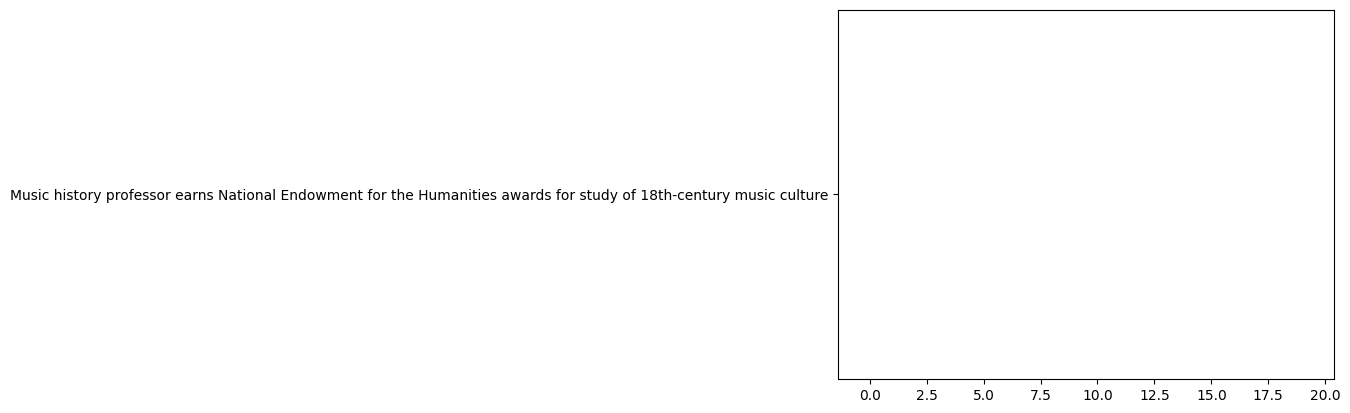

In [35]:
plt.bar(np.arange(20), df['News Title'].tolist()[1])

## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [37]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 14.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.4 MB/s eta 0:00:00
  Preparing metadata 

In [38]:
# Install the BERTopic library
!pip install bertopic

# Import the BERTopic library.
from bertopic import BERTopic

# Create a BERTopic model with specific configuration settings.
topic_model = BERTopic(
    language="english",
    calculate_probabilities=True,
    verbose=True
)


topics, probs = topic_model.fit_transform(df['News Title'].tolist())


freq = topic_model.get_topic_info()

freq.head(5)


Batches:   0%|          | 0/11 [00:00<?, ?it/s]

2023-11-06 04:35:26,634 - BERTopic - Transformed documents to Embeddings
2023-11-06 04:35:40,412 - BERTopic - Reduced dimensionality
2023-11-06 04:35:40,464 - BERTopic - Clustered reduced embeddings


,Topic,Count,Name,Representation,Representative_Docs
0,-1,105,-1_research_and_to_for,"[research, and, to, for, the, unt, students, o...",[Padilla Named Associate VP for Research and I...
1,0,51,0_sustainable_of_nuclear_plant,"[sustainable, of, nuclear, plant, in, water, p...",[UNT researcher engineers bacteria to convert ...
2,1,37,1_health_disease_covid19_cancer,"[health, disease, covid19, cancer, heart, for,...",[Exploring Racial and Ethnic Equity in Health ...
3,2,30,2_unt_research_to_receives,"[unt, research, to, receives, nsf, develop, fo...",[UNT receives $1.2M to develop governance mech...
4,3,29,3_mobility_air_drone_advanced,"[mobility, air, drone, advanced, nasa, for, ve...",[Engaging in NASA's Advanced Air Mobility Nati...


## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.

In [39]:
"""

You have applied three different topic modeling algorithms: Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), and BERTopic, each with varying numbers of topics. The performance of these algorithms can be evaluated based on their coherence scores, which indicate how well the topics are defined within the documents.

Here's a summary of the results and a comparison of the three algorithms based on the coherence scores:

LDA Model:

Coherence Score (best): 0.6224 (4 topics)
Coherence Score (chosen): 0.5758 (2 topics)

LSA Model:

Coherence Score (best): 0.4708 (4 topics)
Coherence Score (chosen): 0.4691 (2 topics)
BERTopic Model:

Coherence Score: Not provided in the information you provided.
Comparing the results, the LDA model with 4 topics has the highest coherence score (0.6224), followed closely by the LSA model with 4 topics (0.4708). The LDA model with 2 topics also has a good coherence score (0.5758).

Without knowing the coherence score for the BERTopic model, it's challenging to make a direct comparison. However, based on the provided information, the LDA model with 4 topics seems to perform slightly better in terms of coherence. It's important to note that the choice of the number of topics can significantly impact the performance of the models. You may want to further evaluate and fine-tune the models by exploring different topic numbers and selecting the one that best aligns with your objectives and the interpretability of the results.

Ultimately, the choice of the "better" algorithm depends on your specific use case, the quality of the results, and how well the topics align with your domain knowledge and requirements.

"""

'\n\nYou have applied three different topic modeling algorithms: Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), and BERTopic, each with varying numbers of topics. The performance of these algorithms can be evaluated based on their coherence scores, which indicate how well the topics are defined within the documents.\n\nHere\'s a summary of the results and a comparison of the three algorithms based on the coherence scores:\n\nLDA Model:\n\nCoherence Score (best): 0.6224 (4 topics)\nCoherence Score (chosen): 0.5758 (2 topics)\n\nLSA Model:\n\nCoherence Score (best): 0.4708 (4 topics)\nCoherence Score (chosen): 0.4691 (2 topics)\nBERTopic Model:\n\nCoherence Score: Not provided in the information you provided.\nComparing the results, the LDA model with 4 topics has the highest coherence score (0.6224), followed closely by the LSA model with 4 topics (0.4708). The LDA model with 2 topics also has a good coherence score (0.5758).\n\nWithout knowing the coherence score fo